In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

###`Q 1-3` Using the 'diamonds' dataset - sns.load_dataset('diamonds')
1. Create a violinplot of 'price' grouped by 'cut'.
2. Create regplot on `carat` vs `price`. and give hue on 'cut'
3. Create boxplot on 'color' and 'price'

In [2]:
# code here
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut', ylabel='price'>

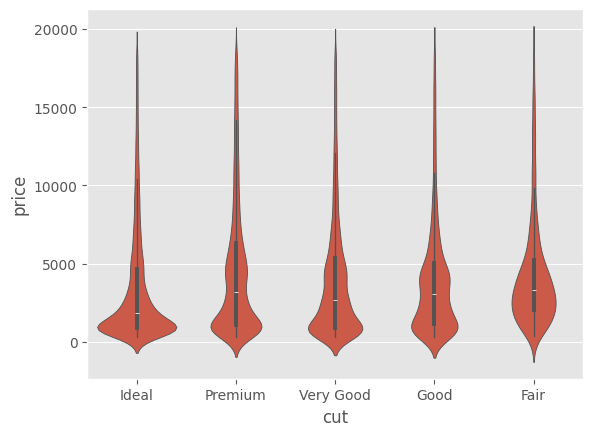

In [5]:
sns.violinplot(data = df, x = 'cut', y = 'price')

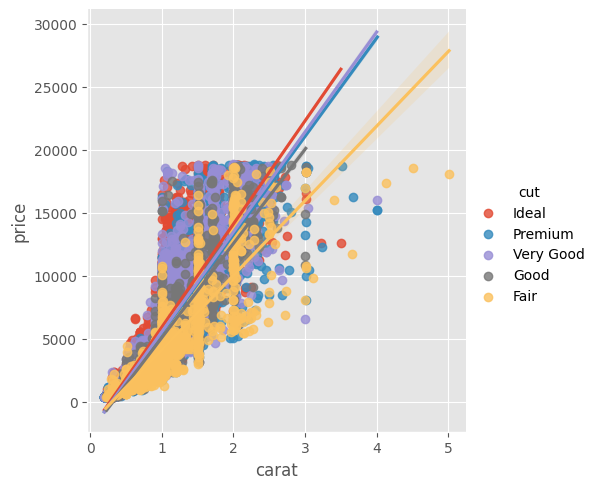

In [7]:
sns.lmplot(data = df, x = 'carat', y = 'price', hue = 'cut')

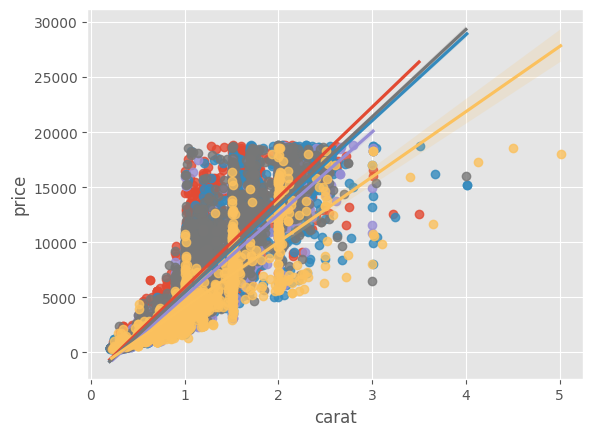

In [9]:
for cut in df["cut"].unique():
    sns.regplot(
        data=df[df["cut"] == cut],
        x="carat",
        y="price",
        label=cut
    )

<Axes: xlabel='color', ylabel='price'>

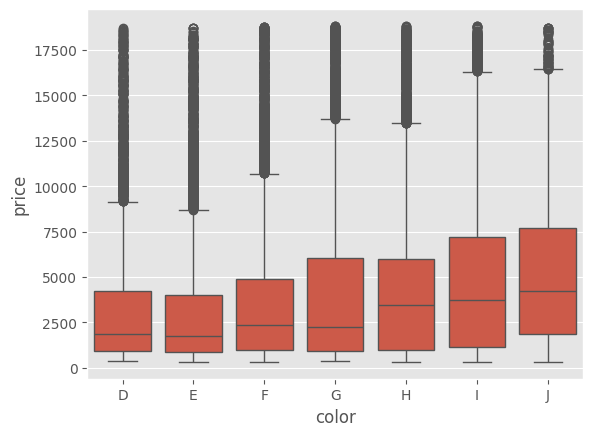

In [10]:
sns.boxplot(data = df, x = 'color', y = 'price')

###`Q 4` Using the 'Taxis' dataset - sns.load_dataset('taxis')
4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.

4.2. Create a regression plot on time of ride  vs total fare. You will need to calculate ride time using pickup and dropoff column.

4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

In [12]:
# code here
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<Axes: xlabel='payment', ylabel='total'>

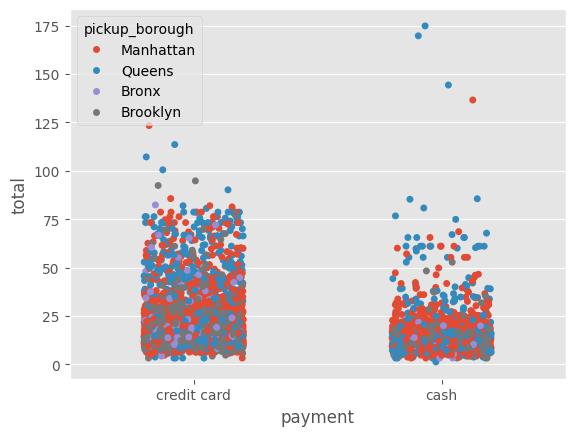

In [18]:
sns.stripplot(data = df, x = 'payment', y = 'total', jitter = 0.2, hue = 'pickup_borough')

<Axes: xlabel='pickup_borough', ylabel='total'>

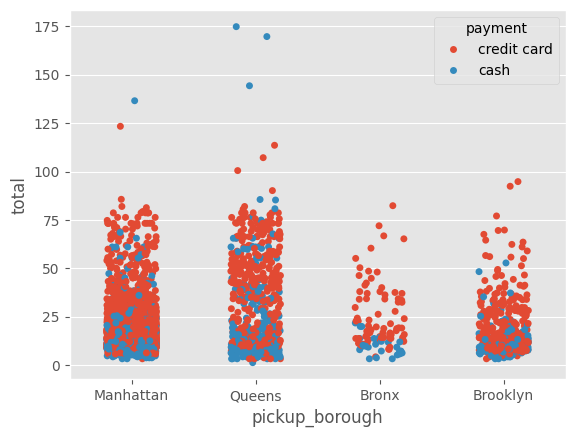

In [19]:
sns.stripplot(data = df, x = 'pickup_borough', y = 'total', jitter = 0.2, hue = 'payment')

In [20]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [40]:
df['time']= df.dropoff - df.pickup
df['time'] = df['time'].dt.total_seconds()

In [41]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0


<Axes: xlabel='time', ylabel='total'>

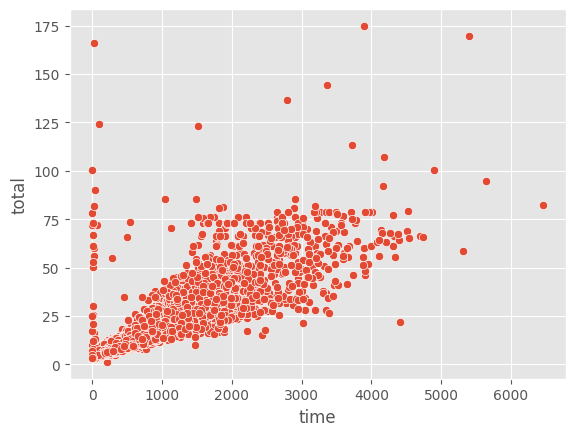

In [42]:
sns.scatterplot(data = df, y = 'total', x = 'time')

<Axes: xlabel='time', ylabel='total'>

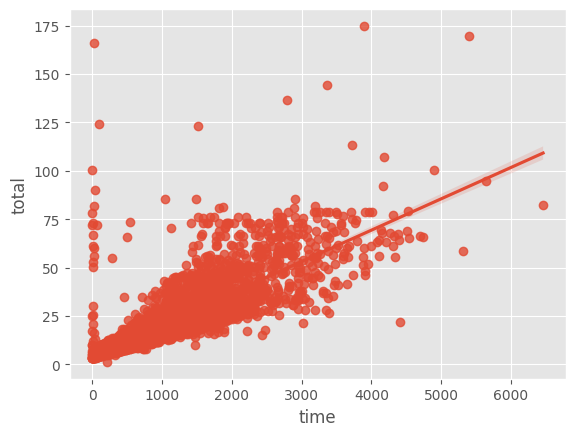

In [48]:
sns.regplot(data = df, y = 'total', x = 'time')

In [50]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Problem 5-12:

### **`Problem 5:`** Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

Text(0.5, 1.0, 'gender vs bloodpressure vs smoker')

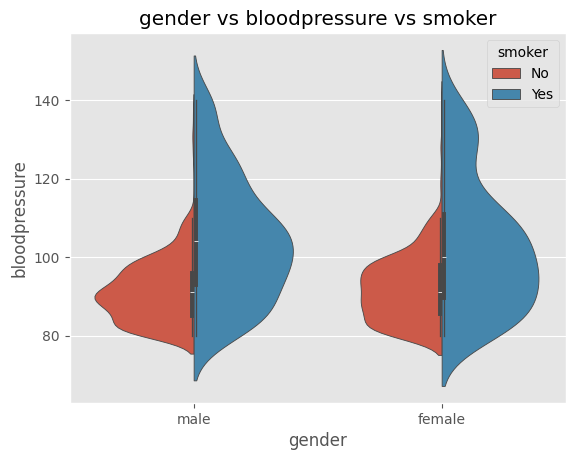

In [72]:
sns.violinplot(data = df, x = 'gender', y = 'bloodpressure', hue = 'smoker', split = True)
plt.title('gender vs bloodpressure vs smoker')

### **`Problem 6:`** Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

<Axes: xlabel='region', ylabel='bmi'>

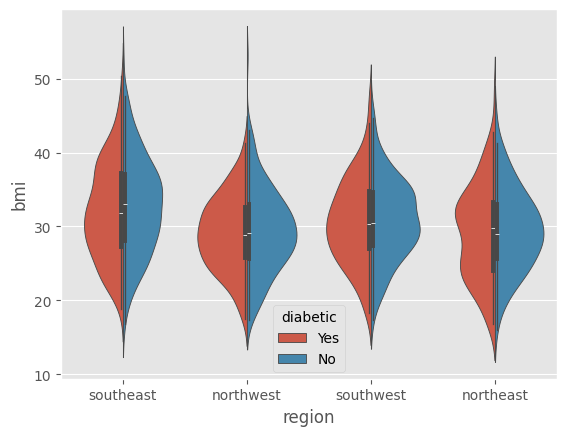

In [77]:
# code here
sns.violinplot(data = df, x = 'region', y = 'bmi', hue = 'diabetic', split = True)

### **`Problem  7:`** Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

<Axes: xlabel='gender', ylabel='claim'>

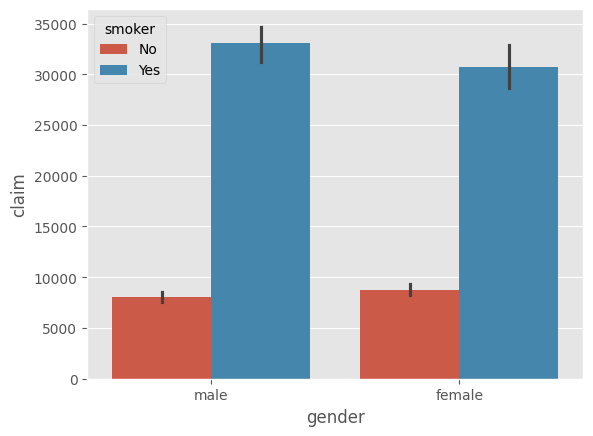

In [78]:
# code here
sns.barplot(data = df, x = 'gender', y = 'claim', hue = 'smoker')

### **`Problem 8:`** Draw a reg plot between "age" and "bmi" columns.

<Axes: xlabel='age', ylabel='bmi'>

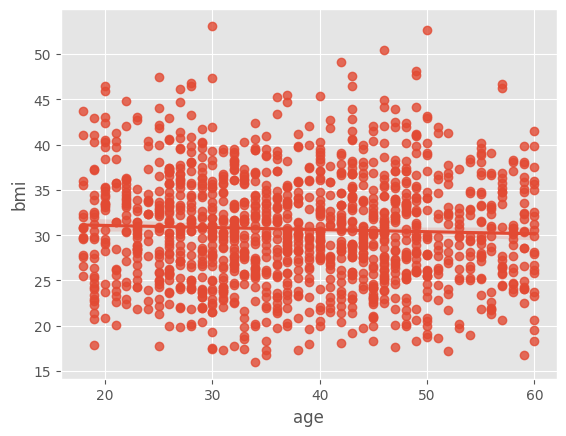

In [79]:
# code here
sns.regplot(data = df, x = 'age', y = 'bmi')

### **`Problem 9:`** Draw a pair plot of the insurance data. Use "gender" as hue parameter.

### **`Problem 10:`** Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

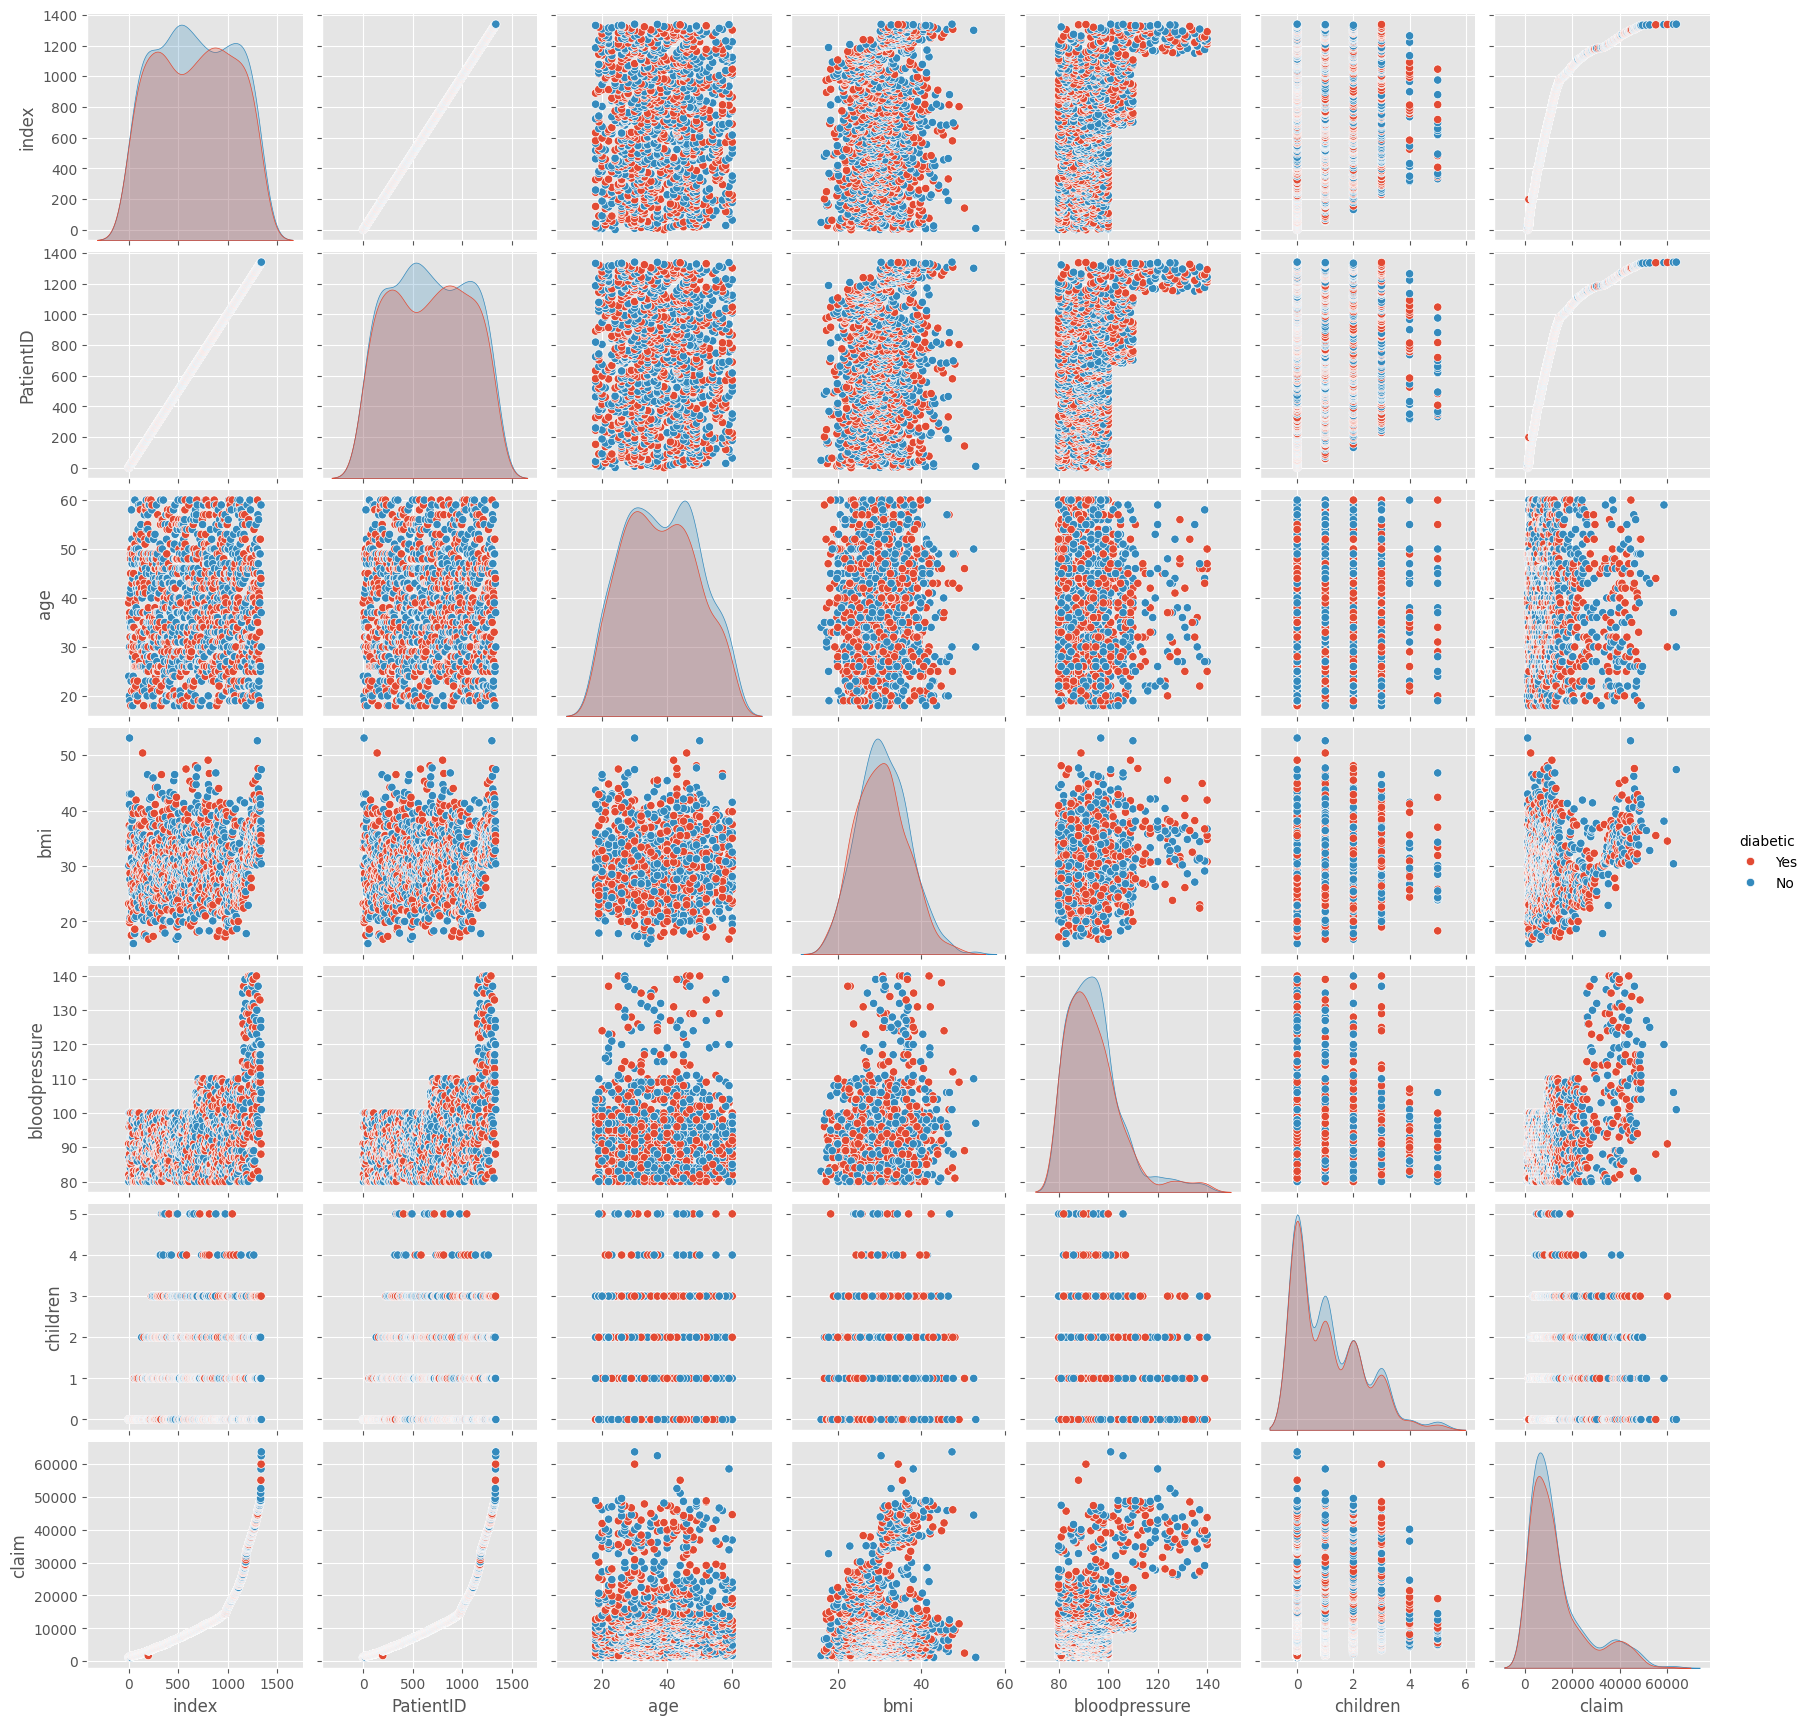

In [81]:
# code here
sns.pairplot(data = df, hue = 'diabetic')

### **`Prolem 11:`** Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

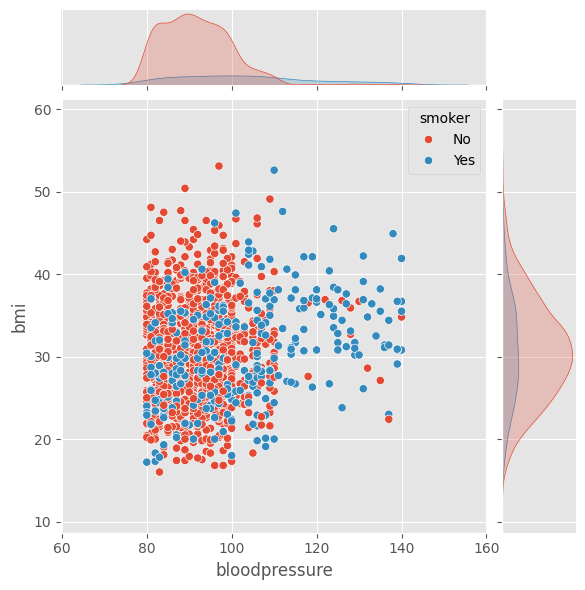

In [82]:
# code here
sns.jointplot(data = df, x = 'bloodpressure', y = 'bmi', hue = 'smoker')

### **`Problem 12:`** Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw

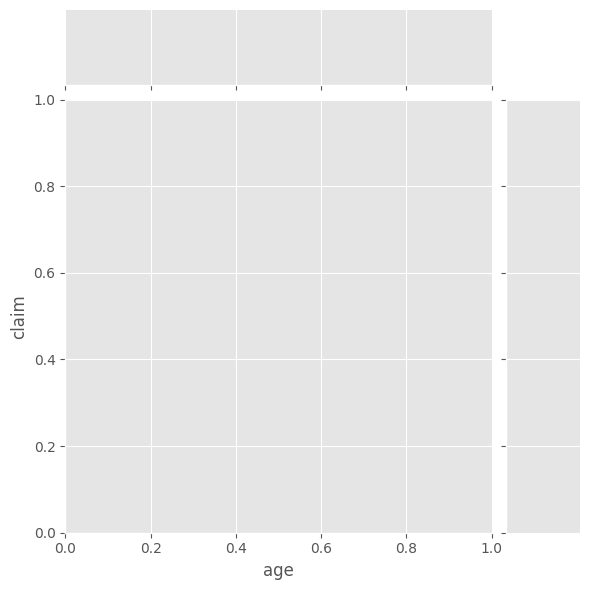

In [85]:
# code here
sns.JointGrid(data = df, x = 'age', y = 'claim')

Text(37.722222222222214, 0.5, 'Claim Amount')

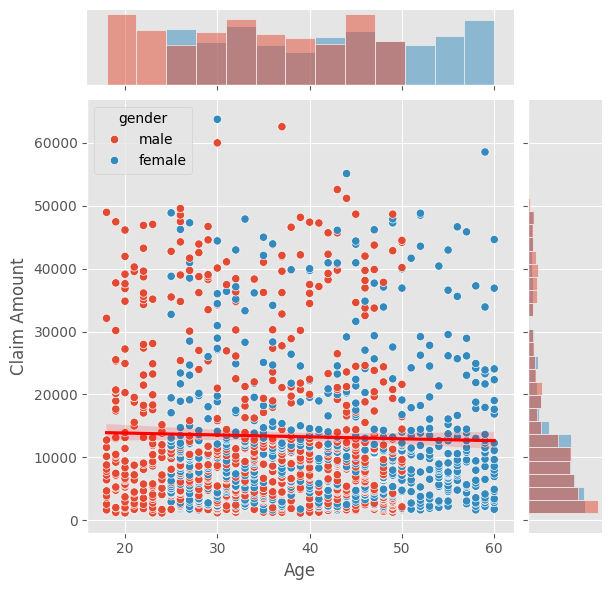

In [87]:
# Create a JointGrid
g = sns.JointGrid(data=df, x="age", y="claim", hue = 'gender')

# Add scatterplot to the central grid
g.plot(sns.scatterplot, sns.histplot)

# Add regression line to the center plot (optional)
sns.regplot(data=df, x="age", y="claim", ax=g.ax_joint, scatter=False, color="r")

# Customize labels
g.ax_joint.set_xlabel("Age")
g.ax_joint.set_ylabel("Claim Amount")